In [32]:
import csv                                   #Importing all the packages needed
import sys
import pandas as pd
import numpy as np
import os
import nltk
from collections import Counter
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt

In [33]:
root ='..\\data'                                                  #Relative path where dataset is stored
r = pd.read_csv(os.path.join(root,'reviews.csv'))                 #Get the dataset and store it in dataframe
l = pd.read_csv(os.path.join(root,'listings.csv'))    #Get the dataset and store it in dataframe

In [34]:
def listingOfreviewer(name):                     #Function to get all the listings used by each reviewer
    reviewer_listing=r.loc[r['reviewer_name'] == name, 'listing_id']
    listingId=Counter(reviewer_listing).most_common(1)
    for id in listingId:
        return id[0]

In [35]:
def listingNeighbourhood(listingId):        #Function to get the Neighbourhood of the most listing used by reviewer
    y=l.loc[l['id'] == listingId]
    return y['neighbourhood']

In [36]:
myfile = open('analysis2.csv', 'w', encoding='utf-8')  #Put the ouput of most frequent location used by visitor in a csv
wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
wr.writerow(('TotalReviewers','NameOfReviewer','FrequentVisitorIn'))

55

In [37]:
maxReveiwer=Counter(r['reviewer_name']).most_common(5)  #Get all the reviewer names from the dataset
topReviewer=[]
totalReviews=[]
for name in maxReveiwer:
    topReviewer.append(name[0])
    totalReviews.append(name[1])
    listingId=listingOfreviewer(name[0])               #Get all the listings of each host
    neighbourhood=listingNeighbourhood(listingId)      #Get the most frequent location of visited by each vistor
    for locationName in neighbourhood:
        wr.writerow((name[1],name[0],locationName))


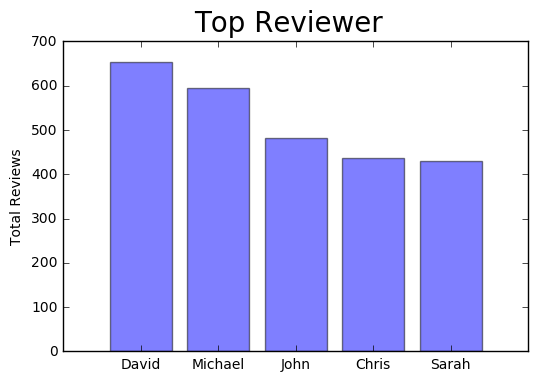

In [38]:
y_pos = np.arange(len(topReviewer))
plt.bar(y_pos, totalReviews, align='center', alpha=0.5)
plt.suptitle('Top Reviewer', fontsize=20)
plt.xticks(y_pos, topReviewer)
plt.ylabel('Total Reviews')
 
plt.show()
plt.savefig('analysis2.png')